In [10]:
import pandas as pd
import os
data_path = os.path.join('..', 'data', 'dataset.csv')
#data = pd.read_csv('/data/dataset.csv')
data = pd.read_csv(data_path)

In [11]:
data.shape

(1460, 22)

In [12]:
data.head()

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
0,8910,1194,Pave,NaN,Corner,1Fam,1Fam,6,6,1959,...,Y,1,0,BuiltIn,2,539.0,2006,WD,Normal,159500
1,1526,630,Pave,NaN,Inside,Twnhs,SFoyer,4,8,1970,...,Y,1,0,Attchd,1,286.0,2009,WD,Normal,86000
2,14598,1933,Pave,NaN,CulDSac,1Fam,2Story,6,5,2007,...,Y,2,1,BuiltIn,3,668.0,2008,WD,Normal,214000
3,7200,1040,Pave,NaN,Inside,Duplex,1Story,4,5,1949,...,N,2,0,Detchd,2,420.0,2009,WD,Normal,90000
4,5687,1716,Pave,Grvl,Inside,2fmCon,2Story,5,6,1912,...,N,2,0,NaN,0,0.0,2008,WD,Normal,135900


## Simple Data Exploration

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# basic view of missing values

missing = data.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

Alley         1369
GarageType      81
GarageArea      43
dtype: int64

In [79]:
missing_na = data.isna().sum().sort_values(ascending=False)
missing_na = missing_na[missing_na > 0]
missing_na


Alley         1369
GarageType      81
GarageArea      43
dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

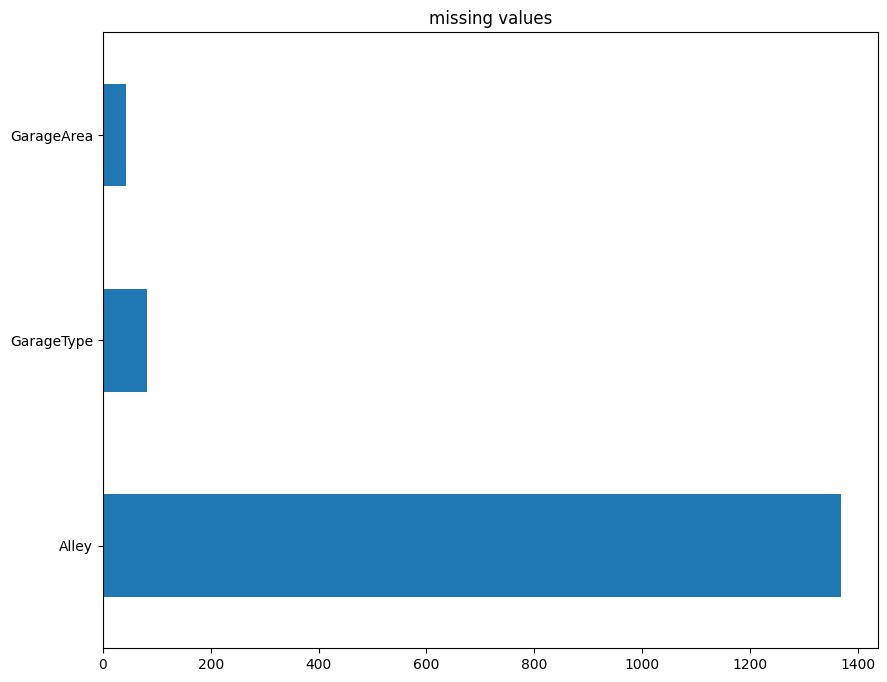

In [16]:
missing.plot(kind="barh", figsize=(10, 8), title="missing values")
plt.show()

In [67]:
# correlation of features with target SalePrice
num_corr = data.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
num_corr

SalePrice           1.000000
OverallQuality      0.790982
GarageCars          0.640409
GarageArea          0.617894
TotalBsmtSF         0.613581
FullBath            0.560664
YearBuilt           0.522897
GrLivArea           0.359387
HalfBath            0.284108
LotArea             0.263843
YearSold           -0.028923
OverallCondition   -0.077856
Name: SalePrice, dtype: float64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation 

In [19]:
data.describe()

,LotArea,GrLivArea,OverallQuality,OverallCondition,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,YearSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1417.000000,1460.000000,1460.000000
mean,10516.828082,1567.207534,6.099315,5.575342,1971.267808,1057.429452,1.565068,0.382877,1.767123,471.409315,2007.815753,180921.195890
std,9981.264932,1072.198454,1.382997,1.112799,30.202904,438.705324,0.550916,0.502885,0.747315,214.217863,1.328095,79442.502883
min,1300.000000,334.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,7553.500000,1130.750000,5.000000,5.000000,1954.000000,795.750000,1.000000,0.000000,1.000000,326.000000,2007.000000,129975.000000
50%,9478.500000,1466.000000,6.000000,5.000000,1973.000000,991.500000,2.000000,0.000000,2.000000,478.000000,2008.000000,163000.000000
75%,11601.500000,1784.500000,7.000000,6.000000,2000.000000,1298.250000,2.000000,1.000000,2.000000,576.000000,2009.000000,214000.000000
max,215245.000000,23400.000000,10.000000,9.000000,2010.000000,6110.000000,3.000000,2.000000,4.000000,1418.000000,2010.000000,755000.000000


In [21]:
data = pd.DataFrame(data, columns=data.columns, index=data.index)
data

,LotArea,GrLivArea,Street,Alley,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,...,CentralAir,FullBath,HalfBath,GarageType,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
0,8910,1194,Pave,NaN,Corner,1Fam,1Fam,6,6,1959,...,Y,1,0,BuiltIn,2,539.0,2006,WD,Normal,159500
1,1526,630,Pave,NaN,Inside,Twnhs,SFoyer,4,8,1970,...,Y,1,0,Attchd,1,286.0,2009,WD,Normal,86000
2,14598,1933,Pave,NaN,CulDSac,1Fam,2Story,6,5,2007,...,Y,2,1,BuiltIn,3,668.0,2008,WD,Normal,214000
3,7200,1040,Pave,NaN,Inside,Duplex,1Story,4,5,1949,...,N,2,0,Detchd,2,420.0,2009,WD,Normal,90000
4,5687,1716,Pave,Grvl,Inside,2fmCon,2Story,5,6,1912,...,N,2,0,NaN,0,0.0,2008,WD,Normal,135900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6000,960,Pave,NaN,Inside,1Fam,1Story,4,4,1920,...,Y,1,0,Detchd,1,308.0,2007,WD,Normal,108500
1456,12150,1795,Pave,Grvl,Inside,1Fam,1.5Fin,5,5,1954,...,N,2,0,Attchd,1,352.0,2008,WD,Normal,131500
1457,10200,1086,Pave,NaN,Inside,1Fam,1Story,5,7,1954,...,Y,1,0,Attchd,2,490.0,2010,WD,Normal,144900
1458,8400,841,Pave,NaN,Inside,1Fam,1Story,4,4,1950,...,Y,1,0,CarPort,1,294.0,2009,WD,Normal,82000


In [26]:
for col in data.columns:
    if data[col].dtype == "object":
        print(f"Column {col} is of type {data[col].dtype}")

Column Street is of type object
Column Alley is of type object
Column LotType is of type object
Column BldgType is of type object
Column HouseStyle is of type object
Column Foundation is of type object
Column CentralAir is of type object
Column GarageType is of type object
Column SaleType is of type object
Column SaleCondition is of type object


In [33]:
streets = data["Street"].value_counts()
streets

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

In [35]:
alleys = data["Alley"].value_counts()
alleys

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### the feature Alley seems like the Street so we can merge both to see if there is any persistency but even in this case we see the number of values Grvl are differents

In [36]:
lotTypes = data["LotType"].value_counts()
lotTypes

LotType
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

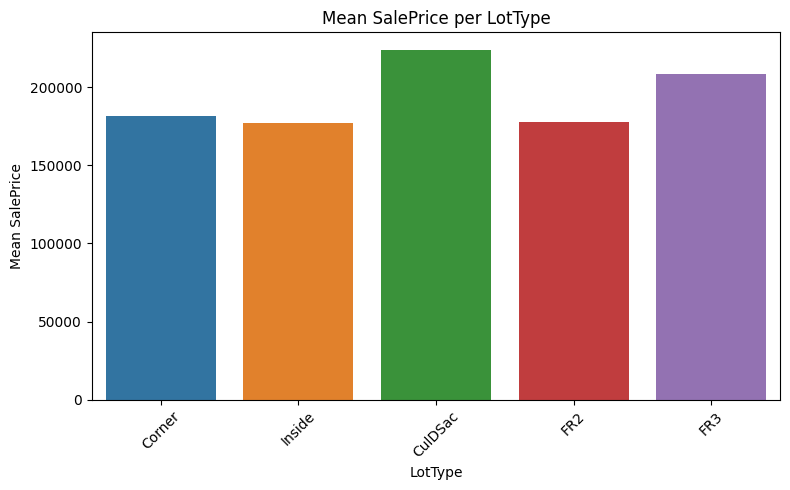

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))


sns.barplot(data=data, x='LotType', y='SalePrice', hue='LotType', estimator='mean', errorbar=None, legend=False)


plt.title('Mean SalePrice per LotType')
plt.xlabel('LotType')
plt.ylabel('Mean SalePrice')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


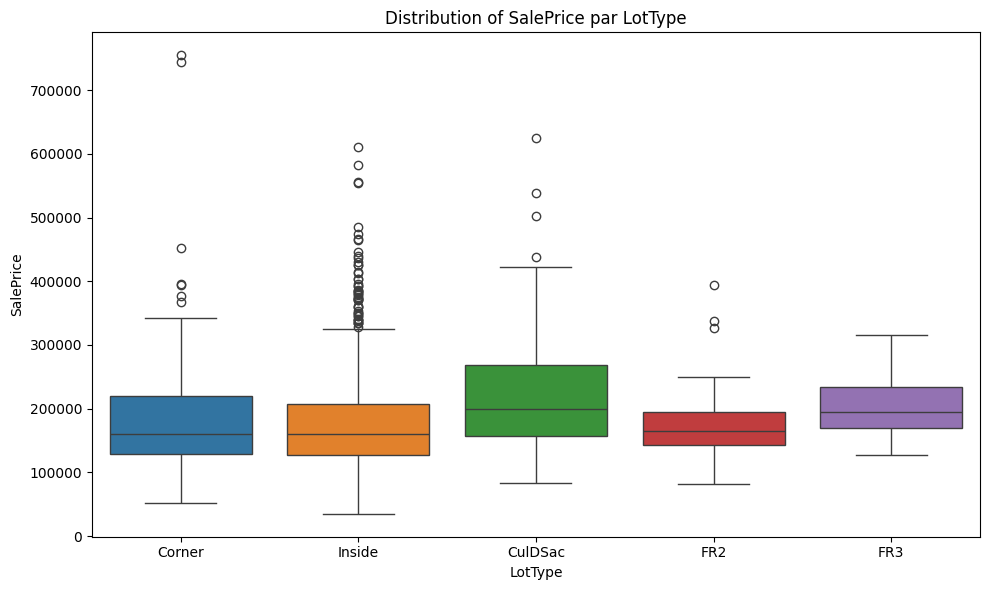

In [89]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='LotType', y='SalePrice', hue='LotType',legend=False)

plt.title('Distribution of SalePrice par LotType')
plt.xlabel('LotType')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

In [37]:
BldgType = data["BldgType"].value_counts()
BldgType

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

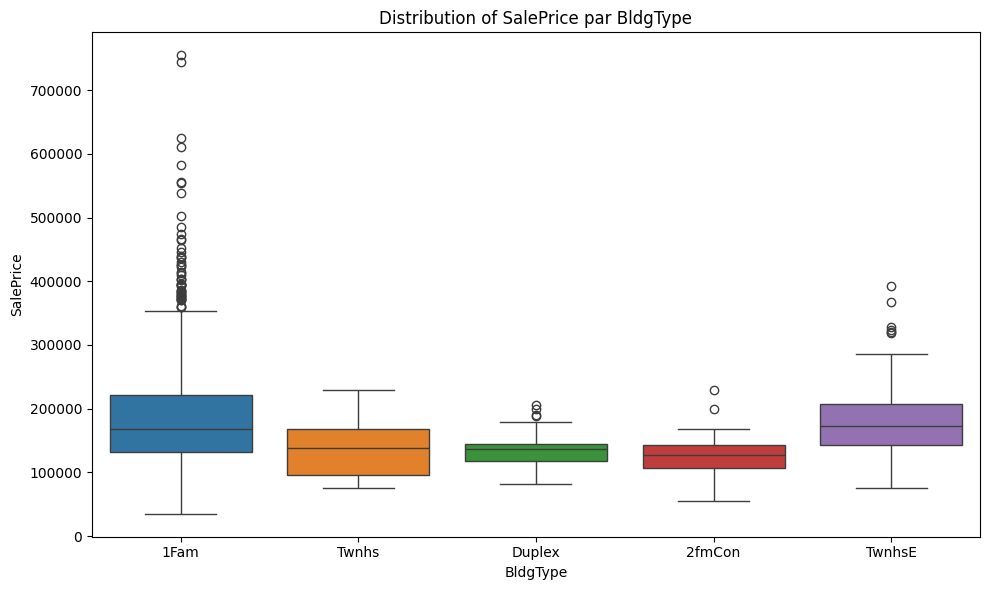

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='BldgType', y='SalePrice', hue='BldgType',legend=False)

plt.title('Distribution of SalePrice par BldgType')
plt.xlabel('BldgType')
plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

In [38]:
HouseStyle = data["HouseStyle"].value_counts()
HouseStyle

HouseStyle
1Story    725
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
1Fam        1
Name: count, dtype: int64

In [ ]:
Foundation = data["Foundation"].value_counts()
Foundation

Foundation
PConc                                 615
CBlock                                585
BrkTil                                144
Do Not use this Field in the Model     84
Slab                                   23
Stone                                   6
Wood                                    3
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

In [41]:
CentralAir = data["CentralAir"].value_counts()
CentralAir

CentralAir
Y    1365
N      95
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

In [42]:
GarageType = data["GarageType"].value_counts()
GarageType

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [44]:
SaleType  = data["SaleType"].value_counts()
SaleType

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

In [45]:
SaleCondition = data["SaleCondition"].value_counts()
SaleCondition

SaleCondition
Normal     1017
normal      181
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

#### for the SaleCondition column, we can see that there are 2 values which are the same but written differently.(Normal and normal) we will take the value Normal to respect the first letter Uppercase of other values

In [46]:
for col in data.columns:
    if data[col].dtype != "object":
        print(f"Column {col} is of type {data[col].dtype}")

Column LotArea is of type int64
Column GrLivArea is of type int64
Column OverallQuality is of type int64
Column OverallCondition is of type int64
Column YearBuilt is of type int64
Column TotalBsmtSF is of type int64
Column FullBath is of type int64
Column HalfBath is of type int64
Column GarageCars is of type int64
Column GarageArea is of type float64
Column YearSold is of type int64
Column SalePrice is of type int64


In [47]:
LotArea = data["LotArea"].value_counts()
LotArea

LotArea
7200     25
9600     24
6000     17
8400     14
10800    14
         ..
13132     1
2268      1
14559     1
2572      1
8910      1
Name: count, Length: 1073, dtype: int64

In [97]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

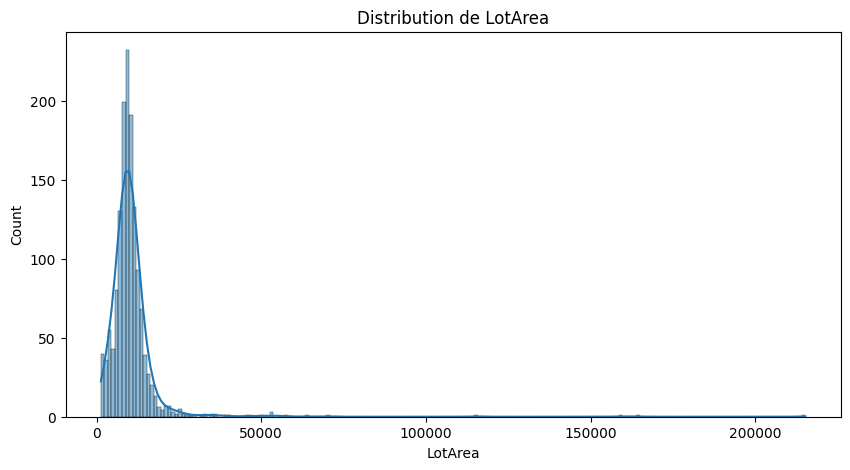

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data['LotArea'], bins=200, kde=True)
plt.title("Distribution of LotArea")
plt.show()


#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

#### for the SaleCondition column, we can see that there are 2 values which are the same but written differently.(Normal and normal) we will take the value Normal to respect the first letter Uppercase of other values

#### there are too many unique values in LotArea, so i will create bins for it

In [51]:
GrLivAreas = data["GrLivArea"].value_counts()
GrLivAreas

GrLivArea
864     22
1040    14
894     11
848     10
1456    10
        ..
1510     1
2013     1
1804     1
2345     1
1274     1
Name: count, Length: 863, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

#### for the SaleCondition column, we can see that there are 2 values which are the same but written differently.(Normal and normal) we will take the value Normal to respect the first letter Uppercase of other values

#### there are too many unique values in LotArea, so i will create bins for it

#### there are too many unique values in GrLivArea, so i will create bins for i

In [52]:
OverallQuality = data["OverallQuality"].value_counts()
OverallQuality

OverallQuality
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [53]:
OverallCondition = data["OverallCondition"].value_counts()
OverallCondition

OverallCondition
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [54]:
YearBuilt = data["YearBuilt"].value_counts()
YearBuilt

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1904     1
1913     1
1882     1
2010     1
Name: count, Length: 112, dtype: int64

In [55]:
TotalBsmtSF = data["TotalBsmtSF"].value_counts()
TotalBsmtSF

TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
792      1
636      1
844      1
408      1
718      1
Name: count, Length: 721, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

#### for the SaleCondition column, we can see that there are 2 values which are the same but written differently.(Normal and normal) we will take the value Normal to respect the first letter Uppercase of other values

#### there are too many unique values in LotArea, so i will create bins for it

#### there are too many unique values in GrLivArea, so i will create bins for i

#### for TotalBsmtSF i could also create bins to group the values into ranges

In [56]:
FullBath = data["FullBath"].value_counts()
FullBath

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

In [57]:
HalfBath = data["HalfBath"].value_counts()
HalfBath

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

#### for the SaleCondition column, we can see that there are 2 values which are the same but written differently.(Normal and normal) we will take the value Normal to respect the first letter Uppercase of other values

#### there are too many unique values in LotArea, so i will create bins for it

#### there are too many unique values in GrLivArea, so i will create bins for i

#### for TotalBsmtSF i could also create bins to group the values into ranges

#### we will see if we cannot combine FullBath and HalfBath into a single feature because they are both bathrooms and they look like they are related

In [58]:
GarageCars = data["GarageCars"].value_counts()
GarageCars


GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

#### for the SaleCondition column, we can see that there are 2 values which are the same but written differently.(Normal and normal) we will take the value Normal to respect the first letter Uppercase of other values

#### there are too many unique values in LotArea, so i will create bins for it

#### there are too many unique values in GrLivArea, so i will create bins for i

#### for TotalBsmtSF i could also create bins to group the values into ranges

#### we will see if we cannot combine FullBath and HalfBath into a single feature because they are both bathrooms and they look like they are related

#### I could create bins for GarageCars 

In [59]:
GarageArea = data["GarageArea"].value_counts()
GarageArea


GarageArea
0.0      81
440.0    49
576.0    42
240.0    37
528.0    33
         ..
889.0     1
689.0     1
704.0     1
748.0     1
386.0     1
Name: count, Length: 435, dtype: int64

#### We can see that the number of missing values for the alley feature is too high. We can drop this feature from the dataset.

####  from what we can see here , YearSold and OverallCondition are independently weakly correlated with SalePrice so we could drop them but we must be carefull because there might be an hidden variable that combined with those variables create a correlation

#### the feature "Street" can be useless because it has only two values and one of them is very rare

#### there is a metadata who tells me not to use Foundation in the model so i will not use it

#### I will not use the CentralAir feature because of the class imbalance 

#### I could drop the SaleType column beacause of the class imbalance but as there are many values in the SaleType column, I will keep it for now.

#### for the SaleCondition column, we can see that there are 2 values which are the same but written differently.(Normal and normal) we will take the value Normal to respect the first letter Uppercase of other values

#### there are too many unique values in LotArea, so i will create bins for it

#### there are too many unique values in GrLivArea, so i will create bins for i

#### for TotalBsmtSF i could also create bins to group the values into ranges

#### we will see if we cannot combine FullBath and HalfBath into a single feature because they are both bathrooms and they look like they are related

#### I could create bins for GarageCars 

#### create bins for GarageArea
#### And maybe GarageCars and GarageArea are too correlated and we can drop one of them

In [60]:

yearSold = data["YearSold"].value_counts()
yearSold


YearSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

In [61]:
salePrice = data["SalePrice"].value_counts()
salePrice

SalePrice
140000    20
135000    17
155000    14
145000    14
110000    13
          ..
179540     1
438780     1
164990     1
348000     1
394432     1
Name: count, Length: 663, dtype: int64

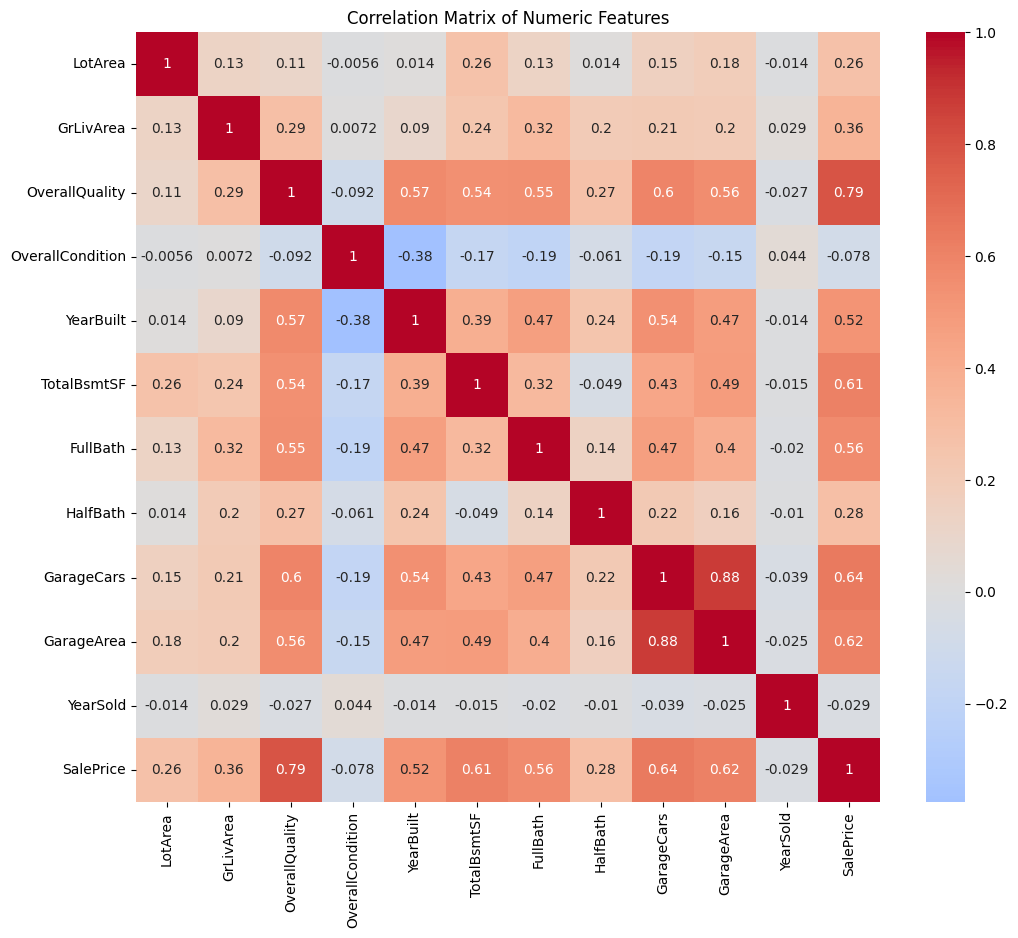

In [63]:
# Calculate correlation matrix for numeric columns only"
correlation_matrix = data.corr(method='pearson', numeric_only=True)
# Create a heatmap of correlations"
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [65]:
import numpy as np
# Fonction pour calculer le correlation ratio (eta²)
def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = values[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((values - y_total_avg) ** 2)
    if denominator == 0:
        return 0.0
    else:
        eta = numerator / denominator
        return eta


In [66]:
target = data["SalePrice"]
categorical_columns = data.select_dtypes(include="object").columns

cat_corr = {}
for col in categorical_columns:
    eta = correlation_ratio(data[col], target)
    cat_corr[col] = eta

cat_corr = pd.Series(cat_corr).sort_values(ascending=False)
print(cat_corr)


Foundation       0.248774
GarageType       0.192481
SaleType         0.137287
SaleCondition    0.135736
HouseStyle       0.086342
CentralAir       0.063166
BldgType         0.034534
LotType          0.021019
Alley            0.004169
Street           0.001684
dtype: float64


In [69]:
all_corr = pd.concat([num_corr, cat_corr])
all_corr = all_corr.sort_values(ascending=False)
all_corr

SalePrice           1.000000
OverallQuality      0.790982
GarageCars          0.640409
GarageArea          0.617894
TotalBsmtSF         0.613581
FullBath            0.560664
YearBuilt           0.522897
GrLivArea           0.359387
HalfBath            0.284108
LotArea             0.263843
Foundation          0.248774
GarageType          0.192481
SaleType            0.137287
SaleCondition       0.135736
HouseStyle          0.086342
CentralAir          0.063166
BldgType            0.034534
LotType             0.021019
Alley               0.004169
Street              0.001684
YearSold           -0.028923
OverallCondition   -0.077856
dtype: float64

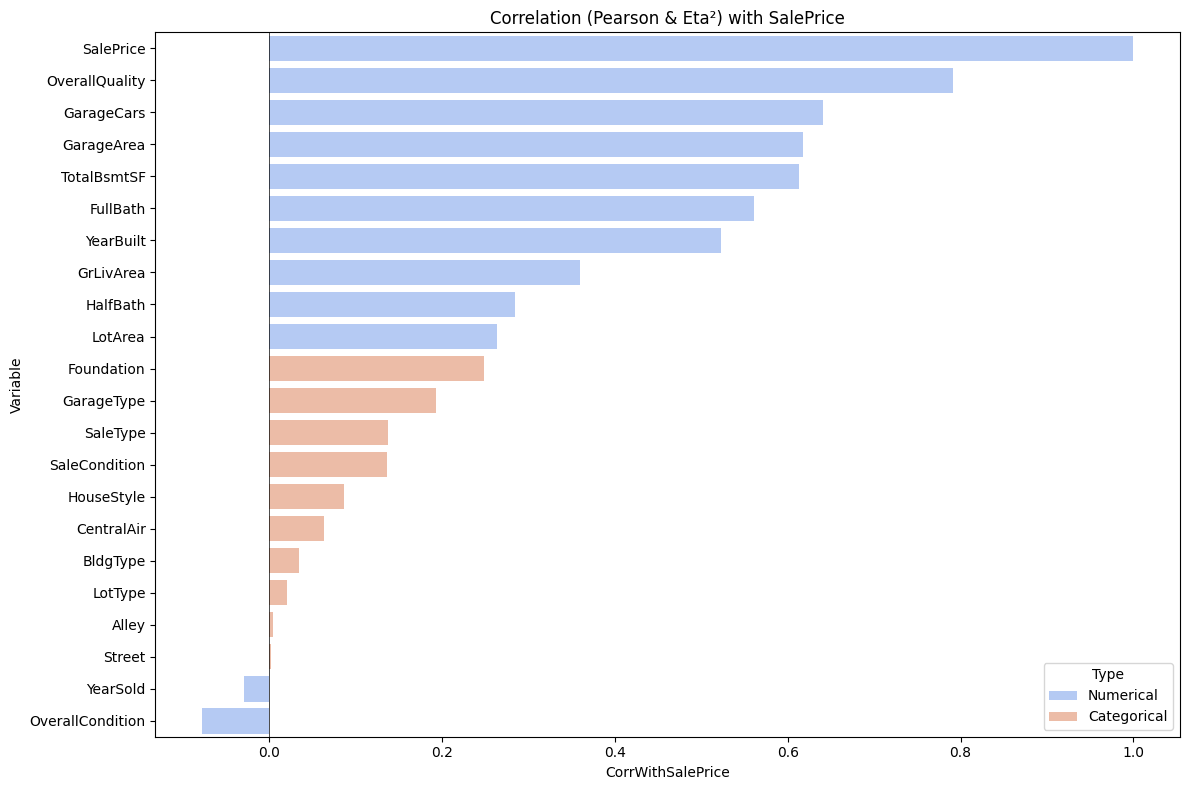

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = pd.DataFrame({
    "Variable": all_corr.index,
    "CorrWithSalePrice": all_corr.values,
    "Type": ["Numerical" if var in num_corr.index else "Categorical" for var in all_corr.index]
})

plt.figure(figsize=(12, 8))
sns.barplot(data=corr_df, x="CorrWithSalePrice", y="Variable", hue="Type", dodge=False, palette="coolwarm")
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Correlation (Pearson & Eta²) with SalePrice")
plt.tight_layout()
plt.show()


##### The Alley feature has too many missing values, so we will drop it from the dataset.

##### Based on the data, YearSold and OverallCondition are only weakly correlated with SalePrice. While we could consider removing them, we should proceed with caution, as they might interact with other variables in ways that reveal a stronger relationship.

##### The Street feature may not be useful since it contains only two categories, and one of them occurs very rarely.

##### According to the metadata, we should not include the Foundation feature in the model, so it will be excluded.

##### The CentralAir feature has a strong class imbalance, so I will not include it in the model.

##### Although the SaleType feature also shows class imbalance, it includes a wide variety of values. For now, I will keep it.

##### In the SaleCondition column, there are two identical values written differently: "Normal" and "normal". We will unify them by using "Normal" to maintain consistency in capitalization.

##### The LotArea feature contains too many unique values, so I will group them into bins.

##### Similarly, the GrLivArea feature has a high number of unique values, so I will also bin it.

##### For TotalBsmtSF, I will consider creating bins to group the values into ranges.

##### I will explore combining FullBath and HalfBath into a single feature, as they both represent bathrooms and appear to be related.

##### I will create bins for GarageCars

##### I will also create bins for GarageArea, and evaluate the correlation between GarageCars and GarageArea. If they are too closely related, one of them may be dropped.

In [ ]:
features_to_drop = ["Alley" ,"Street", "Foundation", "CentralAir" ,"YearSold",  "OverallCondition",  "GarageArea" ,
]
features_to_drop.extend(categorical_columns)
features_to_drop = list(set(features_to_drop))
features_to_drop

#we decide to keep GrageCars over GarageArea for a better correlation with SalePrice

['YearSold',
 'GarageType',
 'SaleType',
 'Foundation',
 'HouseStyle',
 'BldgType',
 'Street',
 'CentralAir',
 'OverallCondition',
 'GarageArea',
 'LotType',
 'Alley',
 'SaleCondition']

## In the next step we will drop the features that are not useful for our modelc,and create potential new features
## (See the notebook preprocessing.ipynb)